In [32]:
import h5py
import matplotlib.pyplot as plt

In [2]:
f = h5py.File('data/drone_sim/sunny.hdf5')

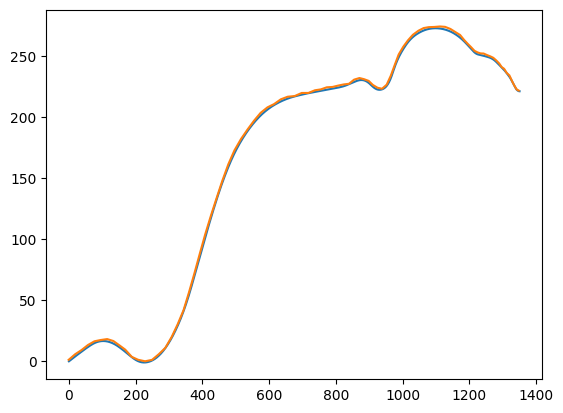

In [70]:
traj = f['trajectory_0005']

gnd = traj['groundtruth']
pos = gnd['position']
att = gnd['attitude']

gps = traj['gps']
gps_pos = gps['position']

plt.plot(pos[:,0], pos[:,1])
plt.plot(gps_pos[:,0], gps_pos[:,1])

In [73]:
att.shape

(8821, 4)

In [38]:
traj.keys()

<KeysViewHDF5 ['camera_data', 'gps', 'groundtruth', 'imu']>

In [43]:
acc = traj['imu']['accelerometer']
gyr = traj['imu']['gyroscope']

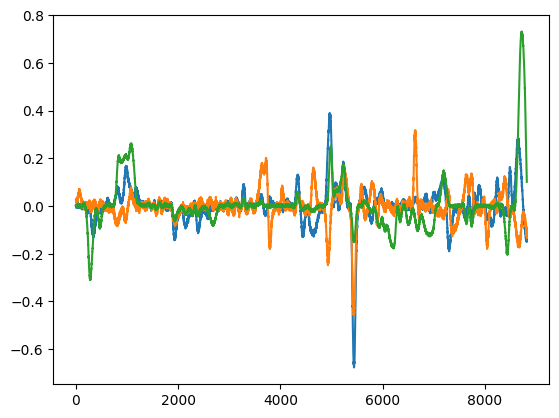

In [69]:
plt.plot(gyr)

In [67]:
import numpy as np

imu_sumdiv = int(np.floor(acc.shape[0]/100))

avg_acc = np.zeros(shape=(imu_sumdiv+1,3))
avg_acc[0,:] = acc[0,:]
avg_gyr = np.zeros(shape=(imu_sumdiv+1,3))
avg_gyr[0,:] = gyr[0,:]

for i in range(imu_sumdiv):
    avg_acc[i+1,:] = np.average(acc[1+100*i:1+100*(i+1),:], axis=0)
    avg_gyr[i+1,:] = np.average(gyr[1+100*i:1+100*(i+1),:], axis=0)

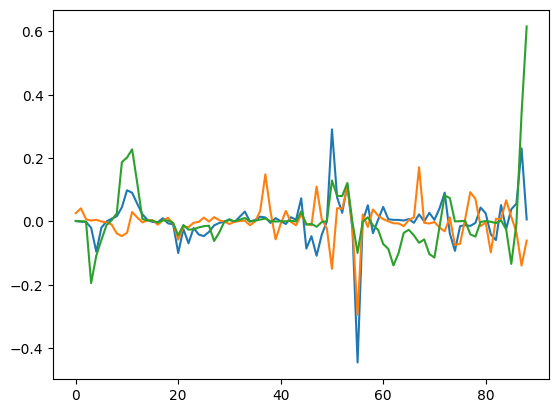

In [68]:
plt.plot(avg_gyr)